<a href="https://colab.research.google.com/github/antoniojgraterol/data_science/blob/main/Ciencia_de_Datos_Proyecto_Final_Graterol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstracto

**Resumen**

Este análisis tiene como objetivo explorar a fondo el dataset de ofertas de trabajo con el fin de identificar patrones y características asociadas con anuncios laborales fraudulentos o engañosos. A través de una variedad de variables que incluyen ubicación, salario, perfil de la compañía, requisitos laborales, entre otros, buscamos entender qué elementos pueden ser predictivos de la autenticidad de una oferta.

Se implementaron algoritmos de clasificación para realizar predicciones sobre la probabilidad de que una oferta de trabajo sea fraudulenta. Estos algoritmos, basados en el aprendizaje automático, se entrenarán utilizando un conjunto de datos etiquetado con ofertas clasificadas como fraudulentas o no fraudulentas. La idea es aprovechar la riqueza de información presente en el dataset para construir un modelo robusto y preciso.

El despliegue de estos algoritmos permitirá no solo la identificación eficiente de ofertas potencialmente engañosas, sino también la creación de un sistema dinámico capaz de adaptarse a las tendencias cambiantes en el mercado laboral. Este enfoque proactivo no solo beneficia a los candidatos al ofrecerles una capa adicional de seguridad, sino que también brinda a las plataformas de empleo herramientas más efectivas para salvaguardar la integridad de sus servicios.

En resumen, este análisis no solo busca entender los factores que rodean a las ofertas de trabajo fraudulentas, sino que también se propone implementar soluciones prácticas y predictivas para mejorar la detección temprana y la prevención de prácticas laborales deshonestas.

**Motivación**

En el vertiginoso mundo laboral actual, la identificación de ofertas de trabajo fraudulentas o engañosas se ha vuelto más crucial que nunca. La proliferación de plataformas en línea ha facilitado la difusión de anuncios laborales, pero lamentablemente, no todos son transparentes o legítimos. La detección temprana de ofertas fraudulentas no solo protege a los candidatos de posibles estafas, sino que también contribuye a la integridad del mercado laboral en su conjunto.

Este análisis busca arrojar luz sobre las características que podrían estar asociadas con ofertas de trabajo fraudulentas o engañosas. Al comprender los patrones subyacentes y las variables clave, no solo podemos mejorar la capacidad de los candidatos para tomar decisiones informadas, sino también ayudar a las plataformas de empleo a perfeccionar sus sistemas de filtrado y seguridad.

**Audiencia**

Este análisis está destinado a un amplio espectro de audiencia que abarca desde profesionales del sector de recursos humanos y reclutamiento hasta candidatos individuales que buscan oportunidades laborales. También es de interés para investigadores académicos y aquellos que están comprometidos con la ética en el ámbito laboral y la lucha contra el fraude.

*   Defensores de la Ética Laboral: Ofrecerá una visión crítica sobre los desafíos éticos en la esfera laboral y la importancia de implementar medidas para salvaguardar la integridad del proceso de contratación.
*   Profesionales de Recursos Humanos y Reclutamiento: Obtendrán insights valiosos para mejorar sus estrategias de filtrado y garantizar la autenticidad de las oportunidades laborales que ofrecen.
*   Candidatos Individuales: Les brindará herramientas para evaluar la legitimidad de las ofertas de trabajo a las que se postulan, empoderándolos para tomar decisiones más informadas sobre sus carreras.
Investigadores Académicos: Podrán utilizar este análisis como base para
*   Investigadores Académicos: Podrán utilizar este análisis como base para investigaciones adicionales sobre la dinámica del mercado laboral y la evolución de las prácticas fraudulentas en el ámbito laboral.
*   Defensores de la Ética Laboral: Ofrecerá una visión crítica sobre los desafíos éticos en la esfera laboral y la importancia de implementar medidas para salvaguardar la integridad del proceso de contratación.

En última instancia, este análisis aspira a ser una contribución valiosa para fomentar un entorno laboral más transparente y confiable para todas las partes involucradas.

#El Problema


Existen un conjunto de preguntas a las que es importante dar respuesta para ir adentrándonos en cómo funcionan los datos, que nos permitan poder conocer como se comportan. Se listan a continuación:
¿Cuál es la distribución geográfica de las ofertas de trabajo en el dataset?

¿Cuáles son los departamentos más comunes para los que se hacen requerimientos laborales?

¿Cómo se distribuyen los rangos salariales en las ofertas de trabajo?

¿Cuál es la proporción de ofertas presenciales versus en línea?

¿Qué porcentaje de anuncios incluyen el logotipo de la empresa?

¿Existen patrones notables en el nivel de experiencia requerido según la industria?

¿Cuáles son las funciones laborales más frecuentes en las ofertas de trabajo fraudulentas o engañosas?

Finalmente, el problema planteado es **determinar qué algoritmo nos permite predecir con buena precisión si una oferta de trabajo es fraudulenta o engañosa**

#Análisis Exploratorio de Datos (EDA)


##Carga de bibliotecas

In [ ]:
#Bibliotecas de procesamiento de datos
import pandas as pd
import numpy as np

#Bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas de machine learning
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Manejo de las advertencias
import warnings
warnings.filterwarnings('ignore')

##Carga del dataset

In [ ]:
df_scam=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jobs_scam_dataset.zip',compression='zip')
df_scam.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


##Diccionario de datos

Variable | Descripción
-------------------|------------------
Title | El título con el que se presenta el anuncio de trabajo
Location | Ubicación geográfica de la oferta de empleo
Department | Departamento requiriente (por ejemplo, ventas)
Salary range | Rango salarial (por ejemplo, entre 50 000 y 60 000 dólares)
Company profile | Una breve descripción de la empresa requiriente
Description | La descripción detallada del anuncio de trabajo
Requirements | Requisitos a cumplir por los interesados
Benefits | Listado beneficios ofrecidos
Telecommuting | Verdadero si el puesto online o a distancia
Company logo | Verdadero si el anuncio contiene logo
Questions | Verdadero si el anuncio contiene preguntas de filtrado
Fraudulent | Verdadero si el anuncio es fraudulento o engañoso
In balanced | Verdadero si el anuncio es parte de una muestra del dataset con igual cantidad de anuncios fraudulentos y no fraudulentos
Employment type | Tipo de empleo (tiempo completo, Jornada parcial, Contrato, etc.)
Required experience | Nivel de experiencia requerida (Ejecutivo, nivel inicial, pasante, etc.)
Required education | Nivel de educación requerida (Doctorado, Maestría, Licenciatura, etc.)
Industry | Industria de la empresa requiriente (Automoción, TI, atención sanitaria, bienes raíces, etc.)
Function | Función para la que se requiere el personal (Consultoría, Ingeniería, Investigación, Ventas, etc.)

##Descripción del dataset



In [ ]:
df_scam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:
print('El dataset está compuesto por '+str(df_scam.shape[0])+' registros y '+str(df_scam.shape[1])+' columnas')

El dataset está compuesto por 17880 registros y 18 columnas


El dataset posee un campo que identifica una muestra de 900 registros, con igual cantidad de anuncios fraudulentos y no fraudulentos (450 fraudulentos y 450 no fraudulentos) para evitar el efecto "reductista" que se produce al comparar la cantidad de registros fraudulentos contra el total de registros (4.84%).

Por tal razón se seccionará el dataframe siguiendo esta premisa

In [ ]:
print('La cantidad de registros fraudulentos es '+str(df_scam[df_scam['fraudulent'] == 't'].shape[0]))
print('El porcentaje en relación al total de regitros es '+str(round(df_scam[df_scam['fraudulent'] == 't'].shape[0]/df_scam.shape[0]*100,2))+'%')

La cantidad de registros fraudulentos es 866
El porcentaje en relación al total de regitros es 4.84%


##Dataset balanceado

In [ ]:
df_scam=df_scam[df_scam['in_balanced_dataset'] == 't']
print('El dataset modificado posee '+str(df_scam.shape[0])+' registros y '+str(df_scam.shape[1])+' campos')

El dataset modificado posee 900 registros y 18 campos


In [ ]:
porcentaje_nulos = (df_scam.isnull().sum() / len(df_scam)) * 100

# Crear una serie con el porcentaje de nulos por columna
serie_nulos = pd.Series(porcentaje_nulos, name='Porcentaje Nulos').sort_values(ascending=False)

# Imprimir la serie
print(serie_nulos)

salary_range           81.333333
department             68.555556
required_education     53.333333
company_profile        52.777778
required_experience    44.444444
function               42.000000
benefits               38.666667
industry               35.444444
employment_type        29.111111
requirements           19.333333
location                2.555556
title                   0.000000
fraudulent              0.000000
has_company_logo        0.000000
has_questions           0.000000
telecommuting           0.000000
description             0.000000
in_balanced_dataset     0.000000
Name: Porcentaje Nulos, dtype: float64


<Axes: >

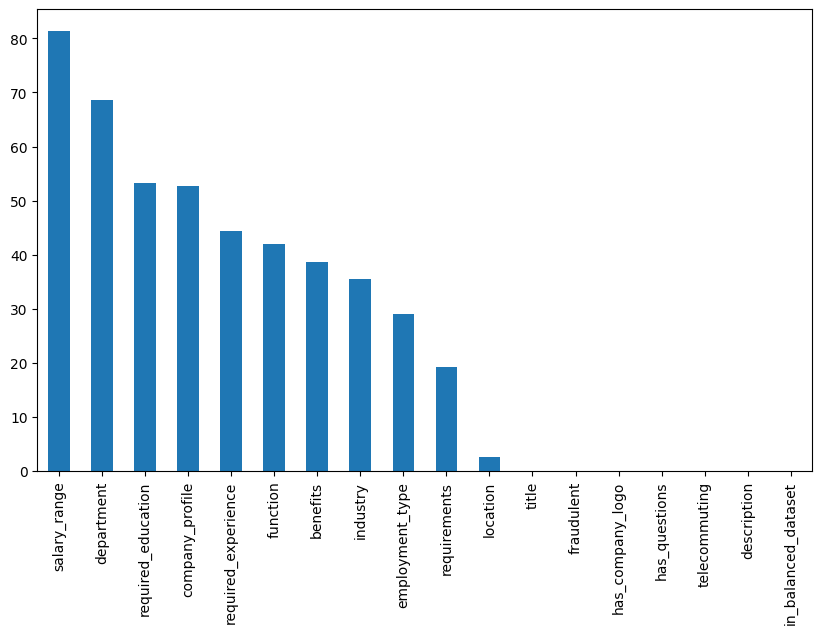

In [ ]:
plt.figure(figsize=(10,6))
serie_nulos.plot(kind='bar')

El dataset está compuesto por 17880 registros y 18 columnas.

Durante este análisis podemos observar una fuerte cantidad de valores ausentes para salary_range, department, required_education, benefits, required_experience, function y industry, con porcentajes de entre 35 al 81%, sin embargo para los fines del estudio las omisiones son relevantes.

Al leer una oferta con una descripción vaga y pocos detalles, se podría tener sospechas, ya que generalmente estas deberían mostrar al público interesado sus bondades con el fin de captar a los candidatos que más se adapten a los requerimientos.

Por lo anterior, se sustituirá todos los elementos vacíos por la etiqueta "Unspecified" (no especificado) ya que ésta ya es utilizado dentro del dataset para este fin.

In [ ]:
#Se reemplazan los vacíos por "Unspecified"
df_scam.fillna("Unspecified", inplace=True)

#Se repite el proceso para listar los porcentajes de nulos a manera de comprobación
porcentaje_nulos = (df_scam.isnull().sum() / len(df_scam)) * 100
serie_nulos = pd.Series(porcentaje_nulos, name='Porcentaje Nulos').sort_values(ascending=False)
print(serie_nulos)

title                  0.0
location               0.0
fraudulent             0.0
function               0.0
industry               0.0
required_education     0.0
required_experience    0.0
employment_type        0.0
has_questions          0.0
has_company_logo       0.0
telecommuting          0.0
benefits               0.0
requirements           0.0
description            0.0
company_profile        0.0
salary_range           0.0
department             0.0
in_balanced_dataset    0.0
Name: Porcentaje Nulos, dtype: float64


##Mapeo de variables

In [ ]:
#Se define una función para mostrar información de cada una de las categorías de las columnas del dataset
def informe_value_counts(df):
    informes = {}  #objeto que cargará el informe de value_counts de la columna
    for columna in df.columns:
        informe = df[columna].value_counts()
        informes[columna] = informe
    return informes

#Se cargan los informe en la resultados
resultados = informe_value_counts(df_scam)

#Se cicla en los informes dentro de resultados para mostrarlos en pantalla
for columna, informe in resultados.items():
    print(f"Informe para la columna '{columna}':")
    print(informe)
    print("\n")

Informe para la columna 'title':
title
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    20
Home Based Payroll Typist/Data Entry Clerks Positions Available         20
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
                                                                        ..
Agent inbound business                                                   1
Global Category Manager - IT/MRO/HR                                      1
Part time shop assistant                                                 1
Engineering Technician                                                   1
Furniture mover                                                          1
Name: count, Length: 700, dtype: int64


Informe para la columna 'location':
location
US, NY, New York         34
AU, NSW, Sydney       

Tras el análisis anterior se evidencia una alta variedad de variedad de valores para varios campos del dataset, es conveniente agrupar dentro de las posibilidades para reducir variabilidad y por tanto el detalle

##Reagrupación de categorías

In [ ]:
#Se reduce el detalle del campo location para mostrar sólo el país
df_scam['location'] = df_scam['location'].apply(lambda x: str(x)[:2] if x != 'Unspecified' and not pd.isnull(x) else x)

#Se reemplazan varias categoría del campo required_education
education_mapping = {
    'High School or equivalent': 'High School',
    'Some College Coursework Completed': 'High School',
    'Vocational - HS Diploma': 'High School',
    'Certification': 'Professional/Vocational',
    'Professional': 'Professional/Vocational',
    'Vocational': 'Professional/Vocational',
    'Vocational - Degree': 'Professional/Vocational',
    'Some High School Coursework': 'Under High School'
}
df_scam['required_education'] = df_scam['required_education'].replace(education_mapping)

#Se reemplazan varias categoría del campo function
function_mapping = {
    'Information Technology': 'TI',
    'Marketing': 'Marketing/Advertising',
    'Advertising': 'Marketing/Advertising',
    'Data Analyst': 'Business Analyst',
    'Financial Analyst': 'Business Analyst',
    'Production': 'Production/Manufacturing',
    'Manufacturing': 'Production/Manufacturing',
    'Research': 'Research/Science',
    'Science': 'Research/Science',
    'Business Development': 'Management',
    'Project Management': 'Management',
    'Product Management': 'Management',
    'Strategy/Planning': 'Management',
    'Administrative': 'Administrative services',
    'Accounting/Auditing': 'Administrative services',
    'Human Resources': 'Administrative services',
    'Finance': 'Administrative services',
    'Public Relations': 'Administrative services',
    'General Business': 'Administrative services'
}
df_scam['function'] = df_scam['function'].replace(function_mapping)

#Se reemplazan varias categoría del campo employment_type
employment_mapping = {
  'Other': 'Unspecified'
}
df_scam['employment_type'] = df_scam['employment_type'].replace(employment_mapping)

#Se reemplazan varias categoría del campo industry_type
industry_mapping = {
  'Financial Services':'Banking and Finance',
  'Banking':'Banking and Finance',
  'Investment Banking':'Banking and Finance',
  'Computer Hardware':'Electrical/Electronic Manufacturing',
  'Semiconductors':'Electrical/Electronic Manufacturing',
  'Restaurants':'Food & Beverages',
  'Food Production':'Food & Beverages',
  'Hospital & Health Care':'Health Care',
  'Health, Wellness and Fitness':'Health Care',
  'Medical Practice':'Health Care',
  'Mental Health Care':'Health Care',
  'Medical Devices':'Health Care',
  'Staffing and Recruiting':'Human Resources',
  'Computer Software':'Information Technology and Services',
  'Internet':'Information Technology and Services',
  'Telecommunications':'Information Technology and Services',
  'Computer Games':'Information Technology and Services',
  'Computer & Network Security':'Information Technology and Services',
  'Computer Networking':'Information Technology and Services',
  'Law Practice':'Legal Services',
  'Online Media':'Media and Entertainment',
  'Entertainment':'Media and Entertainment',
  'Broadcast Media':'Media and Entertainment',
  'Events Services':'Media and Entertainment',
  'Media Production':'Media and Entertainment',
  'Music':'Media and Entertainment',
  'Printing':'Other',
  'Security and Investigations':'Other',
  'Research':'Other',
  'Venture Capital & Private Equity':'Other',
  'Information Services':'Other',
  'Aviation & Aerospace':'Other',
  'Farming':'Other',
  'Sports':'Other',
  'Chemicals':'Other',
  'Government Administration':'Other',
  'Writing and Editing':'Other',
  'Outsourcing/Offshoring':'Other',
  'Business Supplies and Equipment':'Other',
  'Fund-Raising':'Other',
  'Professional Training & Coaching':'Other',
  'Wholesale':'Other',
  'Government Relations':'Other',
  'Machinery':'Other',
  'Higher Education':'Other',
  'Law Enforcement':'Other',
  'Translation and Localization':'Other',
  'Architecture & Planning':'Other',
  'Civil Engineering':'Other',
  'Defense & Space':'Other',
  'Renewables & Environment':'Other',
  'Program Development':'Other',
  'Individual & Family Services':'Other',
  'International Trade and Development':'Other',
  'Veterinary':'Other',
  'Executive Office':'Other',
  'Photography':'Other',
  'Industrial Automation':'Other',
  'Public Safety':'Other',
  'Investment Management':'Other',
  'Motion Pictures and Film':'Other',
  'Primary/Secondary Education':'Other',
  'Religious Institutions':'Other',
  'Import and Export':'Other',
  'Packaging and Containers':'Other',
  'Package/Freight Delivery':'Other',
  'Capital Markets':'Other',
  'Animation':'Other',
  'Luxury Goods & Jewelry':'Other',
  'Fishery':'Other',
  'Commercial Real Estate':'Other',
  'Philanthropy':'Other',
  'Wireless':'Other',
  'Public Policy':'Other',
  'Performing Arts':'Other',
  'Plastics':'Other',
  'Mining & Metals':'Other',
  'Furniture':'Other',
  'Maritime':'Other',
  'Libraries':'Other',
  'Nanotechnology':'Other',
  'Textiles':'Other',
  'Military':'Other',
  'Alternative Dispute Resolution':'Other',
  'Shipbuilding':'Other',
  'Sporting Goods':'Other',
  'Museums and Institutions':'Other',
  'Wine and Spirits':'Other',
  'Ranching':'Other'
}
df_scam['industry'] = df_scam['industry'].replace(industry_mapping)

#Se reemplazan varias categoría del campo location
location_mapping = {
  'FI':'Other',
  'PK':'Other',
  'LT':'Other',
  'MY':'Other',
  'QA':'Other',
  'JP':'Other',
  'RU':'Other',
  'MX':'Other',
  'PT':'Other',
  'BG':'Other',
  'TR':'Other',
  'CN':'Other',
  'CH':'Other',
  'SA':'Other',
  'MU':'Other',
  'HU':'Other',
  'AT':'Other',
  'ID':'Other',
  'MT':'Other',
  'UA':'Other',
  'CY':'Other',
  'IQ':'Other',
  'KR':'Other',
  'TH':'Other',
  'NG':'Other',
  'AR':'Other',
  'LU':'Other',
  'BH':'Other',
  'BY':'Other',
  'PA':'Other',
  'NO':'Other',
  'RS':'Other',
  'KE':'Other',
  'CZ':'Other',
  'LV':'Other',
  'VN':'Other',
  'NI':'Other',
  'TT':'Other',
  'TW':'Other',
  'VI':'Other',
  'KW':'Other',
  'TN':'Other',
  'AM':'Other',
  'IS':'Other',
  'LK':'Other',
  'SK':'Other',
  'CL':'Other',
  'ZM':'Other',
  'BD':'Other',
  'HR':'Other',
  'JM':'Other',
  'KZ':'Other',
  'SV':'Other',
  'CM':'Other',
  'PE':'Other',
  'AL':'Other',
  'GH':'Other',
  'MA':'Other',
  'SI':'Other',
  'CO':'Other',
  'SD':'Other',
  'UG':'Other',
  'KH':'Other'
}
df_scam['location'] = df_scam['location'].replace(location_mapping)

Los cambio de categorías a 'Other' se hicieron para todos aquellos registros que 30 o menos apariciones

In [ ]:
#Se repite el proceso para mostrar las distintas categorías de aquellos campos que sufrieron modificación
resultados = informe_value_counts(df_scam)
for columna, informe in resultados.items():
  if columna=='location' or columna=='required_education' or columna=='function' or columna=='employment_type' or columna=='industry' or columna=='location':
    print(f"Informe para la columna '{columna}':")
    print(informe)
    print("\n")

Informe para la columna 'location':
location
US             589
GB             103
AU              39
GR              30
Unspecified     23
CA              17
Other           17
IN              15
DE              13
NZ              11
IE               6
PL               4
BR               3
FR               3
BE               3
NL               3
SE               3
SG               2
EE               2
ZA               2
IL               2
PH               2
AE               2
EG               2
IT               1
DK               1
HK               1
ES               1
Name: count, dtype: int64


Informe para la columna 'employment_type':
employment_type
Full-time      497
Unspecified    280
Part-time       79
Contract        37
Temporary        7
Name: count, dtype: int64


Informe para la columna 'required_education':
required_education
Unspecified                572
Bachelor's Degree          144
High School                133
Under High School           19
Master's Degree         

Existen 4 campos de mucho valor ('company_profile', 'description', 'requirements' y 'benefits') para el estudio pero debido están constituidos por texto libre, para su correcto análisis se deben aplicar algoritmos para procesamiento de lenguaje natural para poder generar patrones en función del contenido.

Como paleativo se plantea el agregado 4 campos que darán razón de si el campo contiene valor o no, sin importar la calidad de su contenido.

In [ ]:
# Agregar las cuatro columnas con valores 't' o 'f' según las condiciones especificadas
df_scam['has_company_profile'] = df_scam['company_profile'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_description'] = df_scam['description'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_requirements'] = df_scam['requirements'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_benefits'] = df_scam['benefits'].apply(lambda x: 't' if x != 'Unspecified' else 'f')

##Visualizaciones

### Distribución general de la data

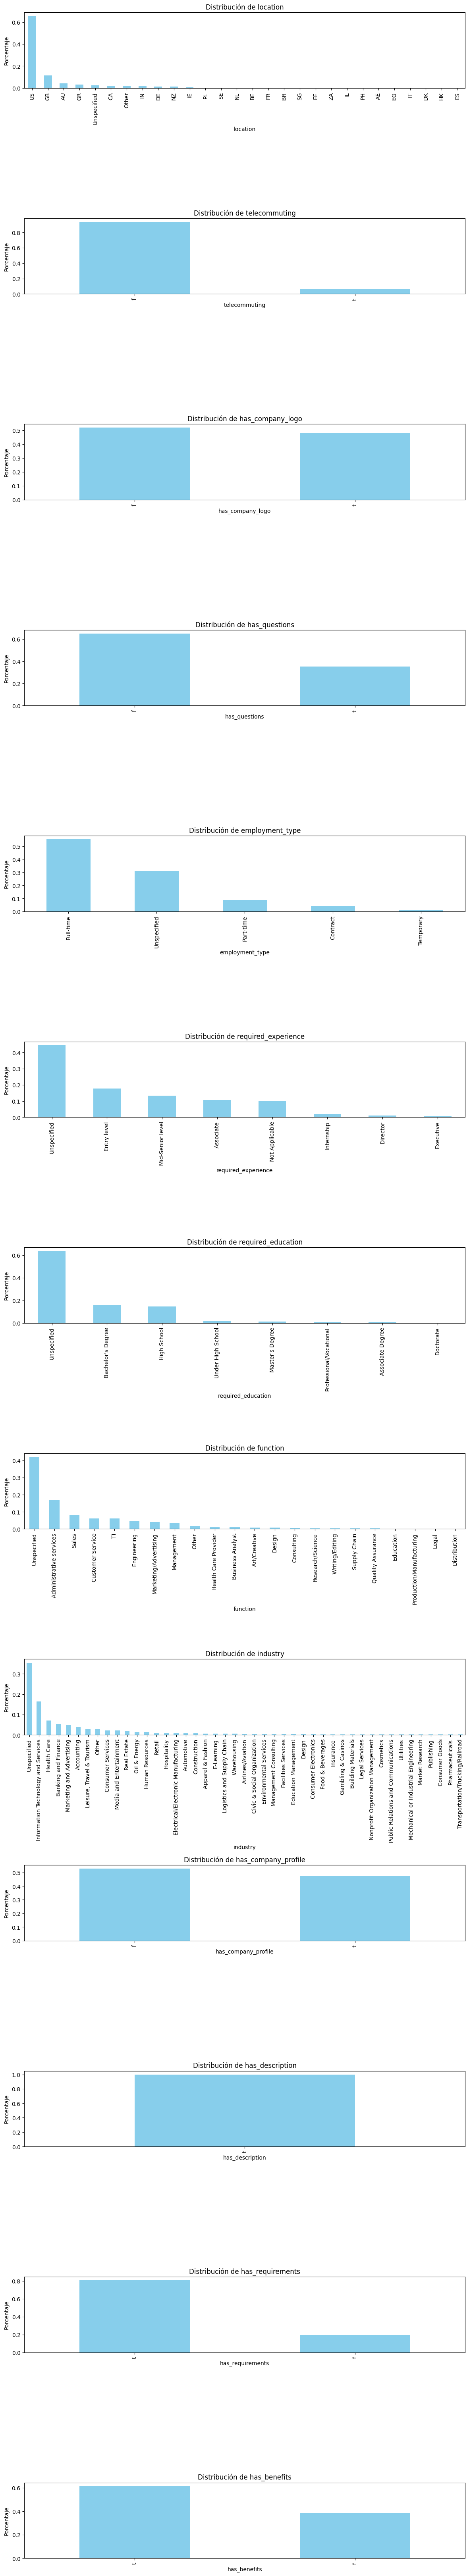

In [ ]:
#Se procede a hacer una distribución de las categorías que se consideran a apropiadas analizar
columns_to_plot = ['location', 'telecommuting', 'has_company_logo', 'has_questions','employment_type','required_experience','required_education', 'function', 'industry','has_company_profile','has_description', 'has_requirements','has_benefits']

#Se crea una figura con subplots apilados verticalmente
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 5 * len(columns_to_plot)))

# Se iterar sobre las columnas seleccionadas y crear gráficos de barras
for i, column in enumerate(columns_to_plot):
    df_scam[column].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Porcentaje')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()

###Distribución de la data en relación a la variable fraudulento

####Gráfico para 'location'

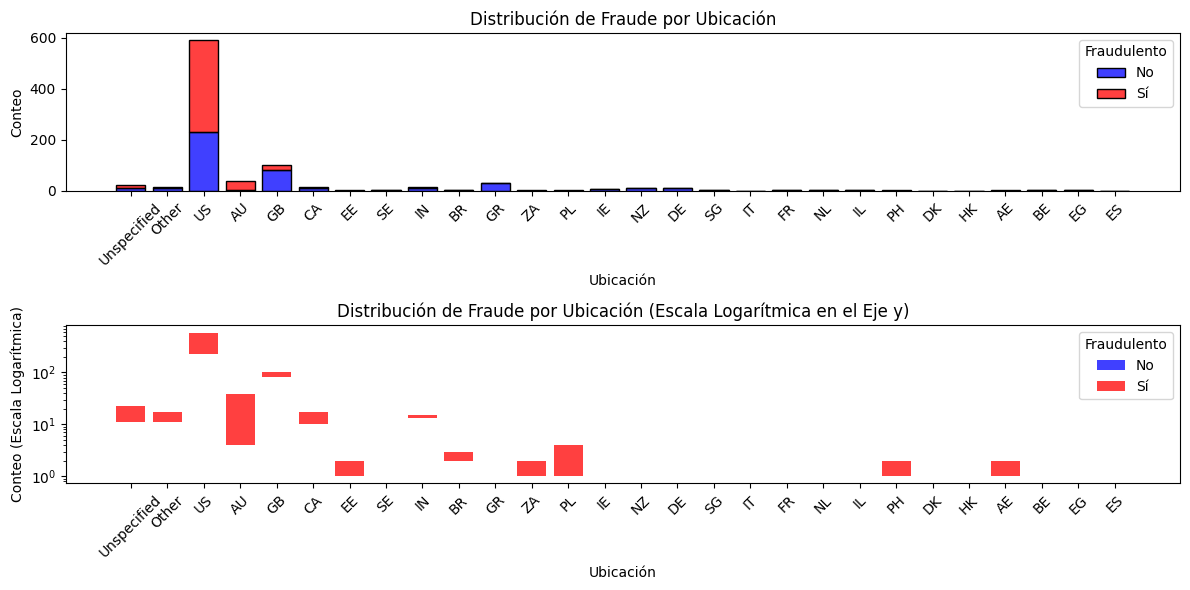

In [ ]:
#Con seaborn se crean gráficos singulares o en pares para la apreciar la relación de las categorías de las
#variables estudiadas con la variable 'fraudulent'
#Gráfico para 'location'
#====================================
#Paleta de colores
colors = {'f': 'blue', 't': 'red'}

# Crear una figura con dos subgráficos (uno encima del otro)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Primer gráfico: sin escala logarítmica en el eje y
sns.histplot(data=df_scam, x='location', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])

# Ajustar el diseño del primer gráfico
axes[0].set_title('Distribución de Fraude por Ubicación')
axes[0].set_xlabel('Ubicación')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)

# Segundo gráfico: con escala logarítmica en el eje y
sns.histplot(data=df_scam, x='location', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])

# Ajustar el diseño del segundo gráfico
axes[1].set_title('Distribución de Fraude por Ubicación (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Ubicación')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

####Gráfico para 'telecommuting'

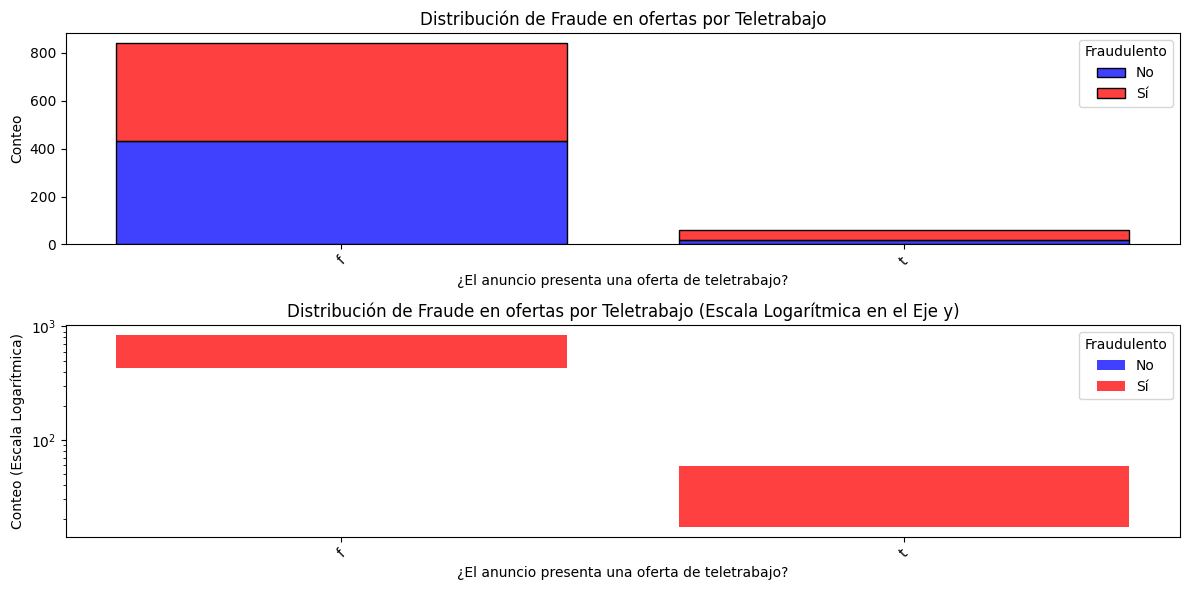

In [ ]:
#Gráfico para 'telecommuting'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='telecommuting', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en ofertas por Teletrabajo')
axes[0].set_xlabel('¿El anuncio presenta una oferta de teletrabajo?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='telecommuting', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en ofertas por Teletrabajo (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio presenta una oferta de teletrabajo?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'has_company_logo'

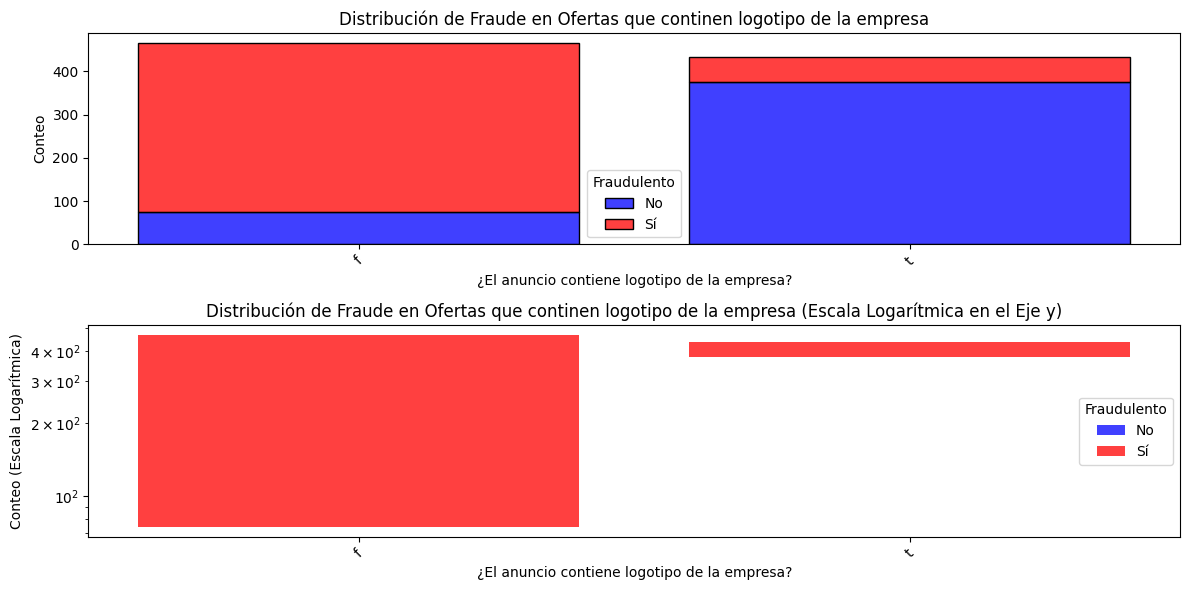

In [ ]:
#Gráfico para 'has_company_logo'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='has_company_logo', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en Ofertas que continen logotipo de la empresa')
axes[0].set_xlabel('¿El anuncio contiene logotipo de la empresa?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='has_company_logo', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en Ofertas que continen logotipo de la empresa (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio contiene logotipo de la empresa?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'has_questions'

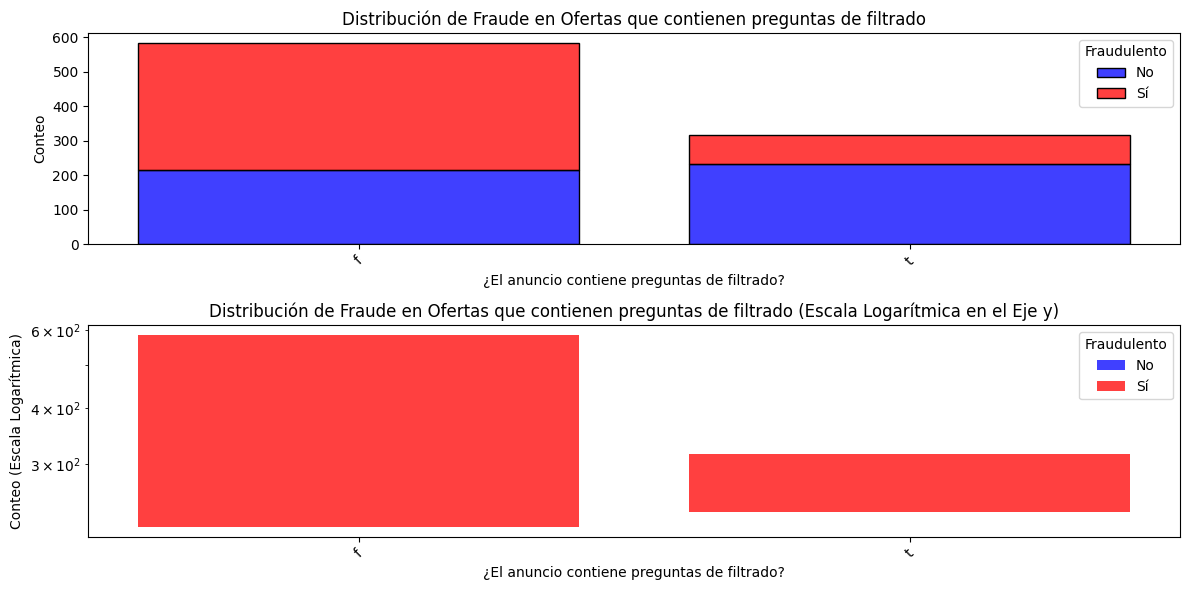

In [ ]:
#Gráfico para 'has_questions'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='has_questions', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en Ofertas que contienen preguntas de filtrado')
axes[0].set_xlabel('¿El anuncio contiene preguntas de filtrado?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='has_questions', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en Ofertas que contienen preguntas de filtrado (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio contiene preguntas de filtrado?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'employment_type'

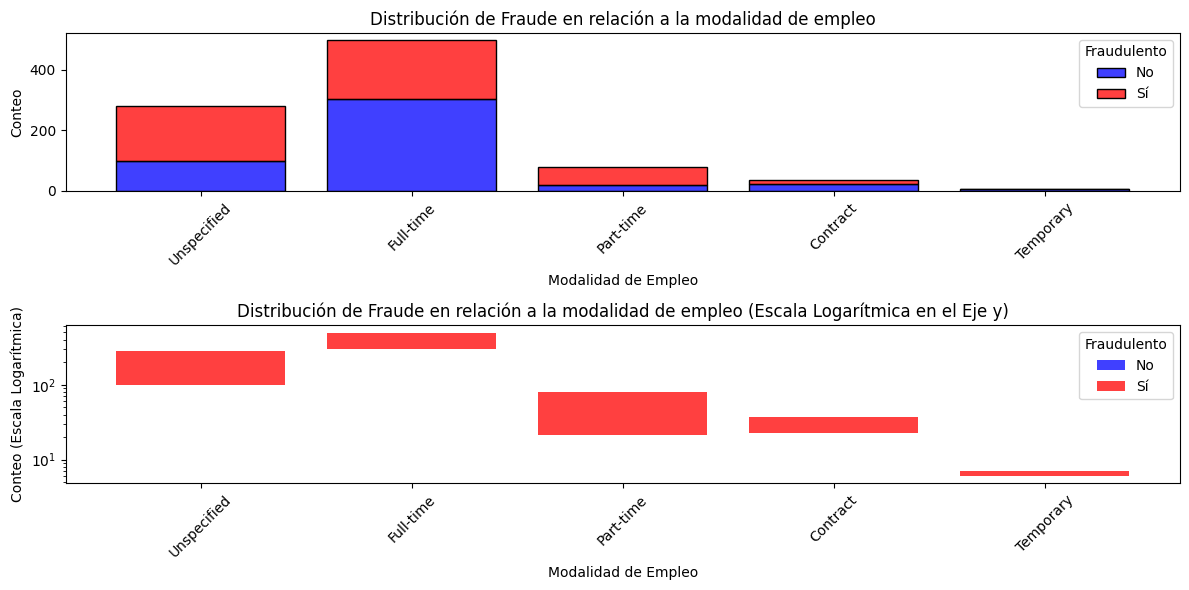

In [ ]:
#Gráfico para 'employment_type'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='employment_type', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en relación a la modalidad de empleo')
axes[0].set_xlabel('Modalidad de Empleo')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)  # Eliminé el parámetro ha='right'
sns.histplot(data=df_scam, x='employment_type', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en relación a la modalidad de empleo (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Modalidad de Empleo')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)  # Eliminé el parámetro ha='right'
plt.tight_layout()
plt.show()

####Gráfico para 'required_experience'

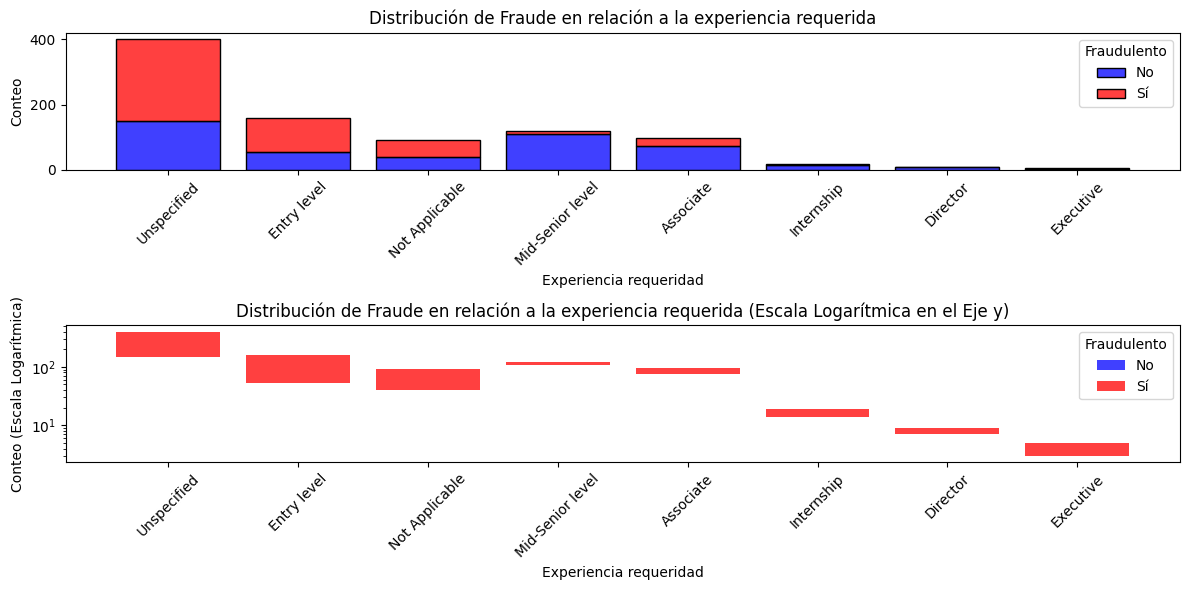

In [ ]:
#Gráfico para 'required_experience'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='required_experience', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en relación a la experiencia requerida')
axes[0].set_xlabel('Experiencia requeridad')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='required_experience', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en relación a la experiencia requerida (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Experiencia requeridad')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'required_education'

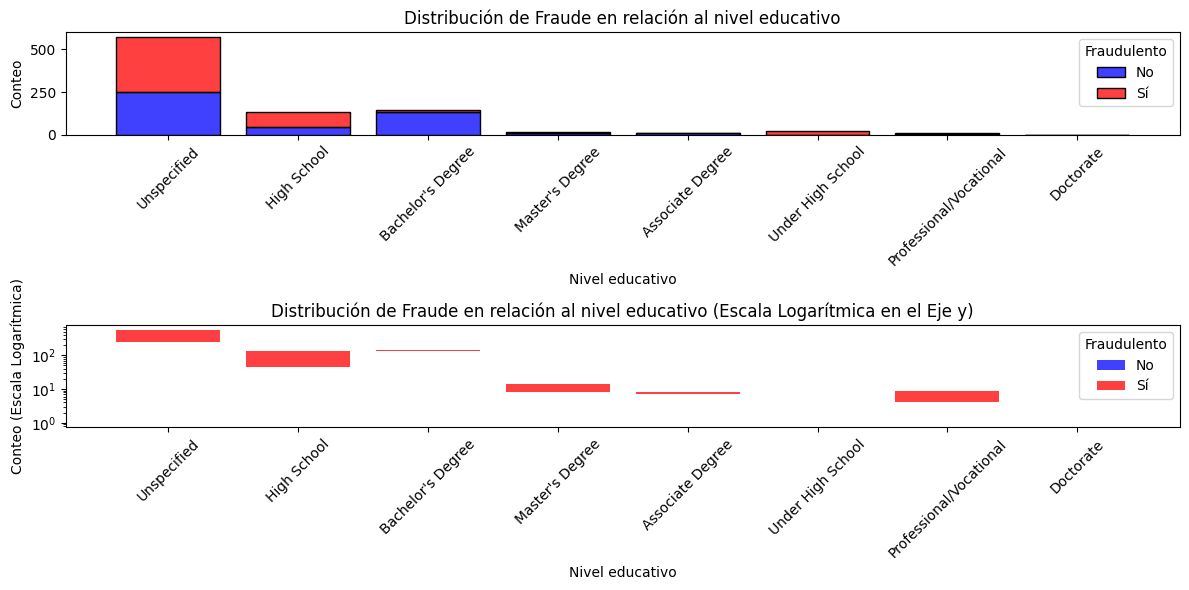

In [ ]:
#Gráfico para 'required_education'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='required_education', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en relación al nivel educativo')
axes[0].set_xlabel('Nivel educativo')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='required_education', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en relación al nivel educativo (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Nivel educativo')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'industry'

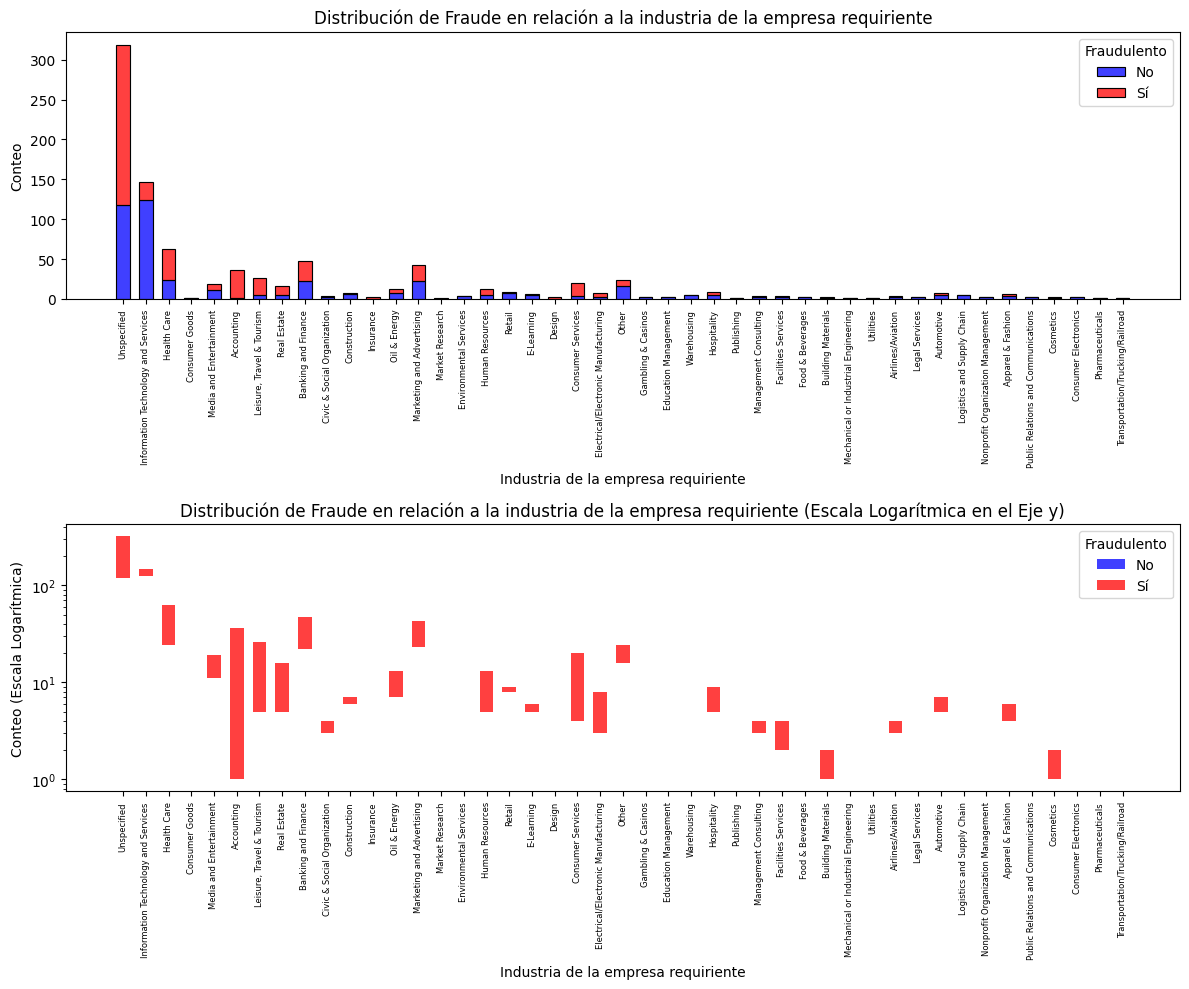

In [ ]:
#Gráfico para 'industry'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.histplot(data=df_scam, x='industry', hue='fraudulent', palette=colors, multiple="stack", shrink=0.6, ax=axes[0])
axes[0].set_title('Distribución de Fraude en relación a la industria de la empresa requiriente')
axes[0].set_xlabel('Industria de la empresa requiriente')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=90, labelsize=6)  # Eliminé el parámetro ha='right'
sns.histplot(data=df_scam, x='industry', hue='fraudulent', palette=colors, multiple="stack", shrink=0.6, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en relación a la industria de la empresa requiriente (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Industria de la empresa requiriente')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=90, labelsize=6)  # Eliminé el parámetro ha='right'
plt.tight_layout()
plt.show()

####Gráfico para 'function'

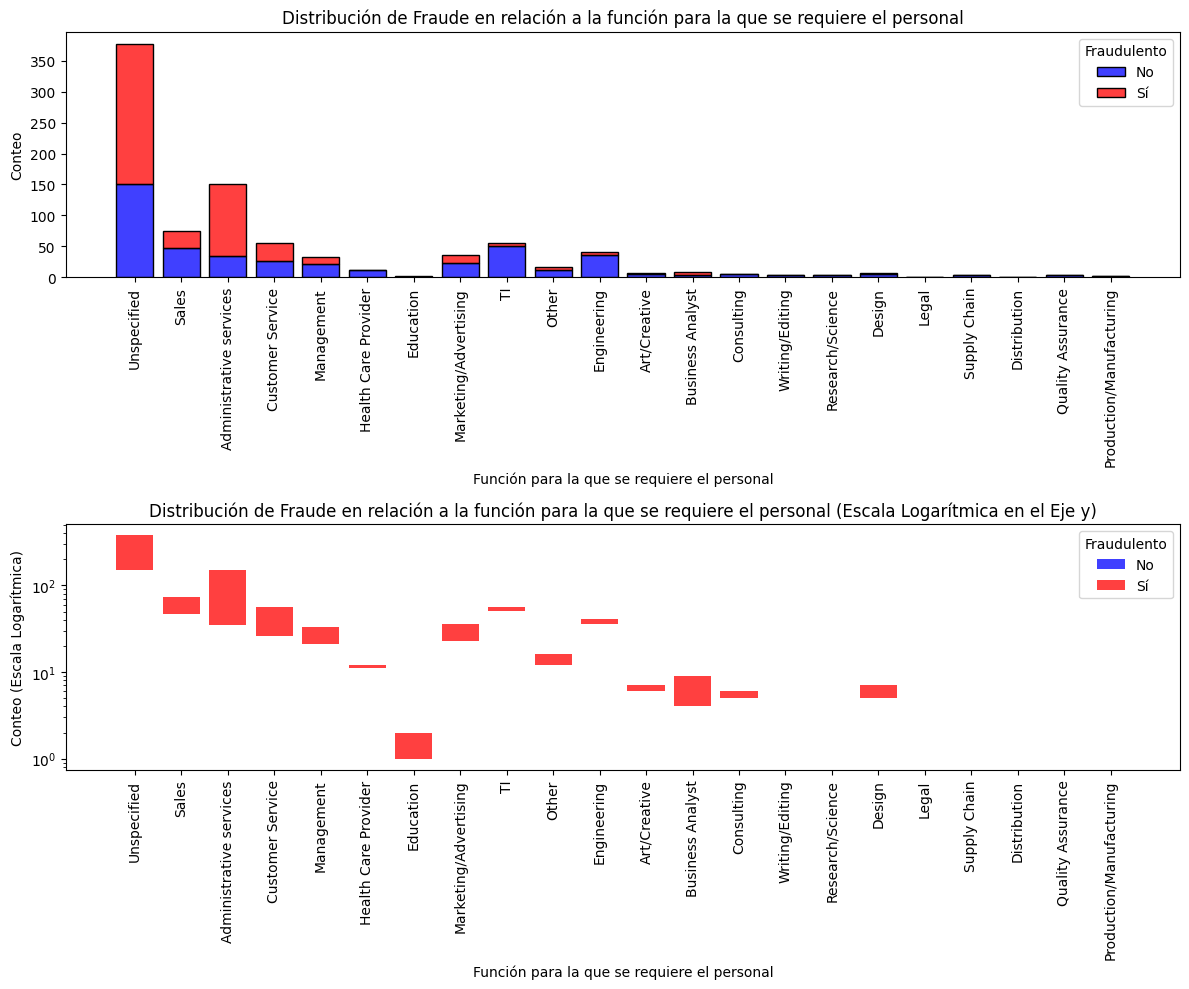

In [ ]:
#Gráfico para 'function'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.histplot(data=df_scam, x='function', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en relación a la función para la que se requiere el personal')
axes[0].set_xlabel('Función para la que se requiere el personal')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data=df_scam, x='function', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en relación a la función para la que se requiere el personal (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('Función para la que se requiere el personal')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

####Gráfico para 'has_company_profile'

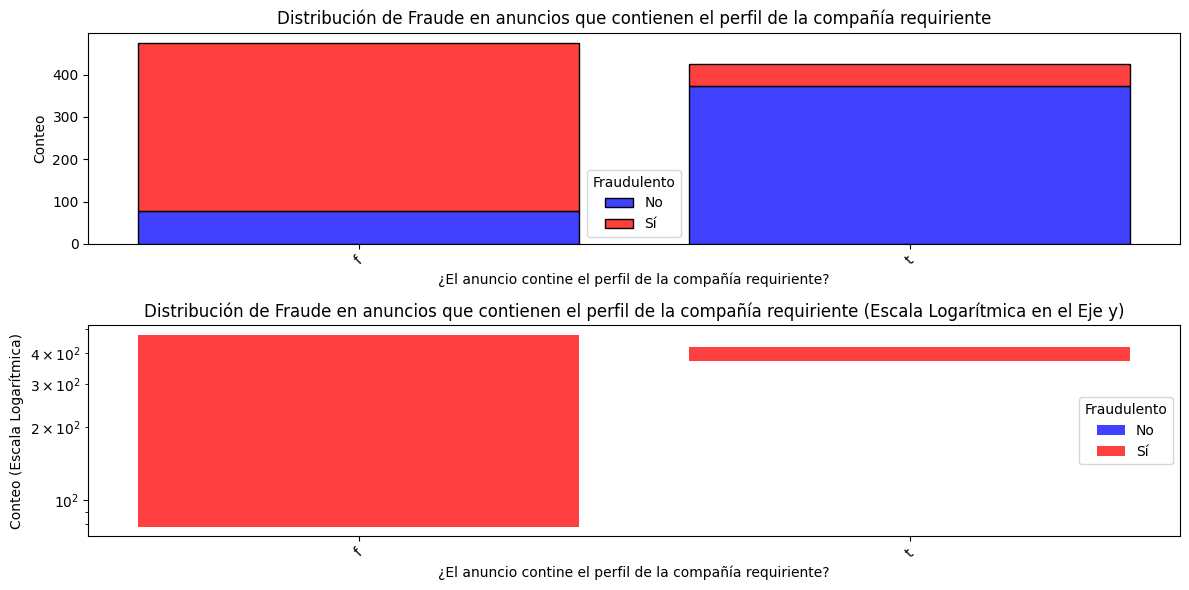

In [ ]:
#Gráfico para 'has_company_profile'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='has_company_profile', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en anuncios que contienen el perfil de la compañía requiriente')
axes[0].set_xlabel('¿El anuncio contine el perfil de la compañía requiriente?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='has_company_profile', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en anuncios que contienen el perfil de la compañía requiriente (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio contine el perfil de la compañía requiriente?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'has_description'

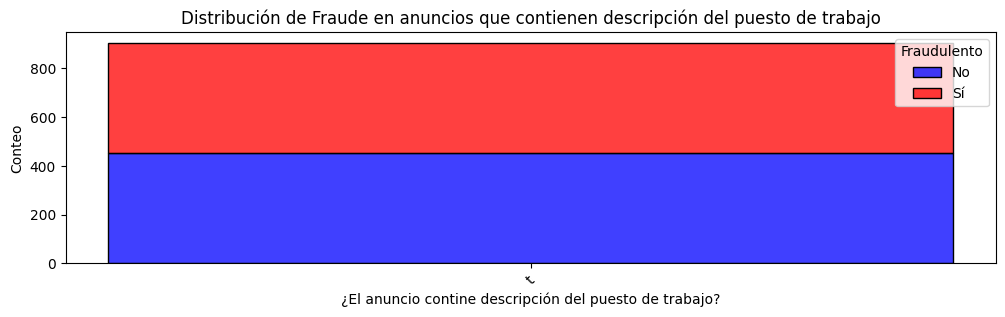

In [ ]:
#Gráfico para 'has_description'
colors = {'f': 'blue', 't': 'red'}
plt.figure(figsize=(12, 3))
sns.histplot(data=df_scam, x='has_description', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8)
plt.title('Distribución de Fraude en anuncios que contienen descripción del puesto de trabajo')
plt.xlabel('¿El anuncio contine descripción del puesto de trabajo?')
plt.ylabel('Conteo')
plt.legend(title='Fraudulento', labels=['No', 'Sí'])
plt.tick_params(axis='x', rotation=45)
plt.show()



####Gráfico para 'has_requirements'

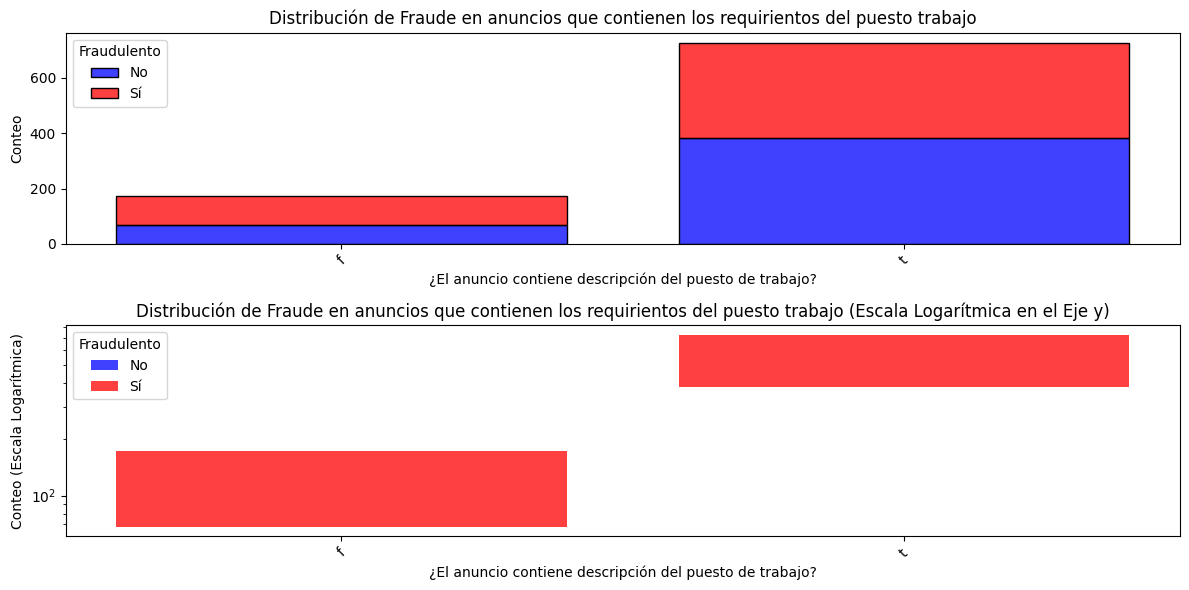

In [ ]:
#Gráfico para 'has_requirements'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='has_requirements', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en anuncios que contienen los requirientos del puesto trabajo')
axes[0].set_xlabel('¿El anuncio contiene descripción del puesto de trabajo?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='has_requirements', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en anuncios que contienen los requirientos del puesto trabajo (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio contiene descripción del puesto de trabajo?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

####Gráfico para 'has_benefits'

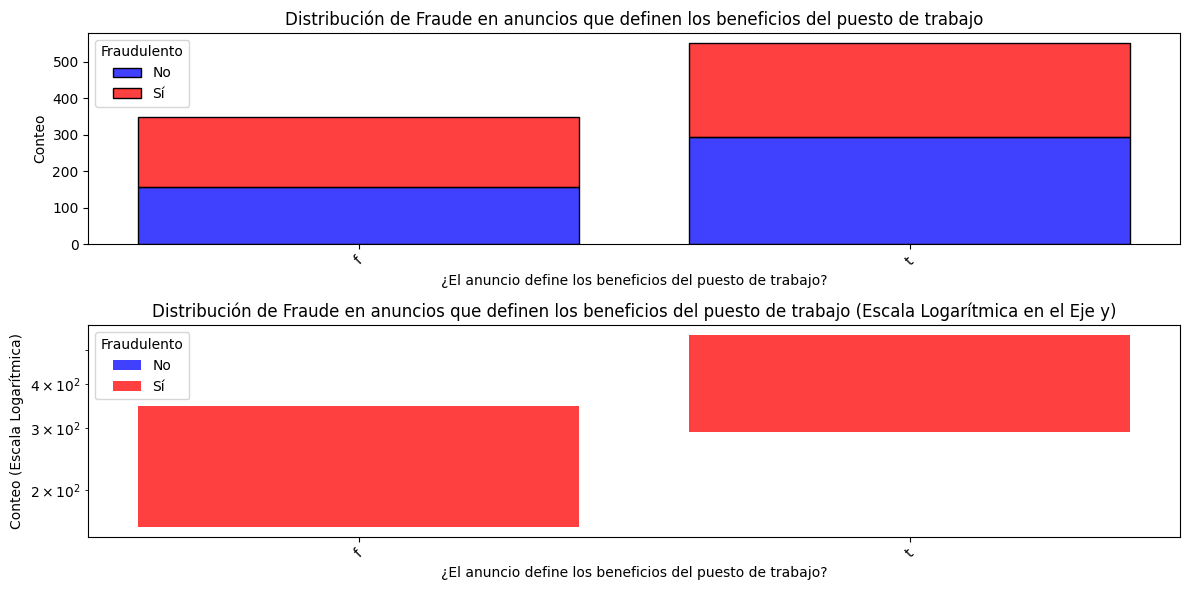

In [ ]:
#Gráfico para 'has_benefits'
colors = {'f': 'blue', 't': 'red'}
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.histplot(data=df_scam, x='has_benefits', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Distribución de Fraude en anuncios que definen los beneficios del puesto de trabajo')
axes[0].set_xlabel('¿El anuncio define los beneficios del puesto de trabajo?')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(data=df_scam, x='has_benefits', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Distribución de Fraude en anuncios que definen los beneficios del puesto de trabajo (Escala Logarítmica en el Eje y)')
axes[1].set_xlabel('¿El anuncio define los beneficios del puesto de trabajo?')
axes[1].set_ylabel('Conteo (Escala Logarítmica)')
axes[1].legend(title='Fraudulento', labels=['No', 'Sí'])
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

##Respuestas preliminares

Tras los análisis, arreglos y sencillas visualizaciones aplicados a la data procedemos a dar respuestas las interrogantes iniciales:

**¿Cuáles son los departamentos más comunes para los que se hacen requerimientos laborales?**

La alta variabilidad y alto porcentaje del campo de 'department' resta valor a las conclusiones que se puedan arrojar en base a su data, por lo que se recurre a campos similares más fiables que pueden servir de referencia. Usaremos los campos 'function' e 'industry' para concluir que el sector de Tecnología de la Información ('Information Technology and Services' y 'TI')

**¿Cómo se distribuyen los rangos salariales en las ofertas de trabajo?**

El análisis sobre el campo 'salary_range' tampoco es fiable porque posee el nivel más alto de vacíos ~84%, por lo que cuyo análisis no fue realizado por su poco capacidad de representación de la data.

**¿Cuál es la proporción de ofertas presenciales versus en línea?**

Una gran mayoría de las ofertas son de tipo presencial, representando
el 96% de la data.

**¿Qué porcentaje de anuncios incluyen el logotipo de la empresa?**

Una gran mayoría de las ofertas son poseen logotipo de la empresa, representando el 80% de la data.

**¿Existen patrones notables en el nivel de experiencia requerido según la industria?**

En las visualizaciones se evidencia que el mayor volumen de empleos se ofrece para profesionales con educación superior de carrera larga (4 a 6 años), es decir perfiles como Lincenciados e Ingenieros, entre otros.

**¿Cuáles son las funciones laborales más frecuentes en las ofertas de trabajo fraudulentas o engañosas?**

Como era de esperarse las ofertas con mayor cantidad de datos ausentes tienden a ser fraudulentas. A continuación de hace una descripción más detallada por cada gráfico:

*   Para 'location': US (Estados Unidos) posee la mayor cantidad de anuncios y también la mayor cantidad de anuncios fraudulentos, al punto de que la cantidad de anuncios fraudulentos supera a los no fraudulentos. Es importante tener en cuenta que luego del balanceo del dataset se hacen posible estos efectos, ya que de descartaron cerca 17000 registro, que siguiendo la tendencia de la data, eran mayoritariamente de US.
*   Para 'telecommuting': la distribución muestra no tener correlación con esta variable ya que tanto para trabajos presenciales como a distancia, la proporción de fraudes es muy similar.
*   Para 'has_company_logo': es clara la relación entre los anuncios sin logotipo de empresa y los fraudes, cerca del 80% de los anuncios sin logotipo de la empresa terminaron siendo fraudulentos
*   Para 'has_questions': al igual que en el caso pasado, los anuncio sin preguntas de filtrado está muy relacionados con fraudes, cerca del 2/3 de los anuncios sin logotipo de la empresa terminaron siendo fraudulentos
*   'employment_type' es una variable multicategórica, y se pueden detallar varios puntos (1) La categoría 'Unspecified' tiene una alta distribución tasa de anuncios fraudulentos; (2) La categoría 'Full-time' tiene la mayor cantidad de anuncios fraudulentos pero su tasa de anuncios fraudulentos no es mayor que para la categoría 'Unspecified' y (3) La categoría 'Part-time' figura como la de mayor tasa de anuncios fraudulentos.
*   'required_experience' es otra variable multicategórica, donde la categoría 'Unspecified' posee una tasa mayor al 50% de anuncios fraudulentos, por otros las categorías 'Entry level' y 'Not Applicable' poseen una distribución similar pero con menor cantidad de anuncios totales.
*   'required_education' es también multicategórica, 'Unspecified' sigue siendo manteniendo su tendencia con los anuncios fraudulentos, sim embargo la distribución muestra que los extremos de la gama son bastantes susceptibles al fraude ya que al contrario de las demás 'Bachelor's Degree', 'Master's Degree' y 'Associate Degree' tienen una muy baja tasa de anuncios fraudulentos.
*   'industry' es otra variable multicategórica de la cual se puede concluir que 'Unspecified' mantiene su tendencia al fraude, que 'Information Technology and Services' (TI) aporta la mayor cantidad de ofertas y que existen casos como 'Health Care', 'Accounting', 'Leisure, Travel and Tourism' y 'Customer Service' con muy altos índices de anuncios fraudulentos.
*   'function' es otra multicategórica, de la cual se puede decir que 'Unspecified' ratifica su tendencia fraudulenta, asimismo 'Adimistratice services' también ratifica la analizado de la distribución de 'industry' ya que esta categoría engloba sevicios como 'Accounting'.
*   'has_company_profile' en una variable binaria y repite el comportamiento de 'has_company_logo' y 'has_questions', donde la carencia de información se relaciona con anuncios fraudulentos
*   'has_requirements' y 'has_benefits' son variables binarias que como 'telecommuting' muestra no tener correlación con los anuncios fraudulentos.








#Ingeniería de atributos

Este dataset es estrictamente categórico, ya que la única variable con intención numérica (rango salarial) es una representación ordinal de lo niveles salariales y no valores numéricos continuos.

Se plantean hacer las siguientes modificaciones al dataset:




1.   Eliminar las variable contenedoras texto que no serán procesadas en este trabajo ('title',	'company_profile', 	'description', 'requirements' y	'benefits')
2.   Eliminar la variable 'salary_range' ya que su poca cantidad de valores cargados la hace perder su potencial descriptivo.
3.   Eliminar la variable 'in_balanced_dataset' que luego del balanceo del dataset perdió su utilidad práctica.
4.   Eliminación de las variables 'department' que por alto volumen de categorías se hace difícil de reducir y caracterizar.

In [ ]:
#Lista de columnas a eliminar
columnas_a_eliminar = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'salary_range', 'in_balanced_dataset', 'department']

#Elimina las columnas
df_scam_II=df_scam.drop(columnas_a_eliminar, axis=1)

5.   Aplicación de label encoding para las variables 'location', 'industry' y 'function', ya que no existe orden entre las categorías y su alta cantidad hace computacionalmente inviable aplicar one-hot encoding.

In [ ]:
#Generamos el objeto label_encoder
label_encoder = preprocessing.LabelEncoder()

columnas_a_encodear = ['location', 'industry', 'function']

#Hacemos un bucle para repetir el proceso en los campos de interés
for columna in columnas_a_encodear:
  df_scam_II[columna]= label_encoder.fit_transform(df_scam_II[columna])

6.   Asignación manual de valores para 'telecommuting','has_company_logo', 'has_questions', 'fraudulent', 'has_company_profile',	'has_description',	'has_requirements' y 'has_benefits', campos de valores binarios.
7.   Asignación manual de valores binarios para 'employment_type', 'required_experience' y 'required_education'.

In [ ]:
#Columnas binarias
columnas_a_encodear=['telecommuting','has_company_logo','has_questions','fraudulent','has_company_profile','has_description','has_requirements','has_benefits']
for columna in columnas_a_encodear:
    df_scam_II[columna]=df_scam_II[columna].replace({'t':1,'f':0})

#Colunmas de categorías ordinales
columna='employment_type'
columna_employment_type={
  'Unspecified':0,
  'Part-time':1,
  'Full-time':2,
  'Contract':3,
  'Temporary':4
}
df_scam_II[columna]=df_scam_II[columna].replace(columna_employment_type)

columna='required_experience'
columna_required_experience={
  'Unspecified':0,
  'Not Applicable':1,
  'Internship':2,
  'Entry level':3,
  'Mid-Senior level':4,
  'Associate':5,
  'Director':6,
  'Executive':7
}
df_scam_II[columna]=df_scam_II[columna].replace(columna_required_experience)

columna='required_education'
columna_required_education={
  'Unspecified':0,
  'Under High School':1,
  'High School':2,
  'Professional/Vocational':3,
  'Associate Degree':4,
  "Bachelor's Degree":5,
  "Master's Degree":6,
  'Doctorate':7
}
df_scam_II[columna]=df_scam_II[columna].replace(columna_required_education)

#Se verifica el dataframe final
df_scam_II.head()

,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits
144,26,0,0,0,0,0,0,42,20,1,0,1,0,0
180,20,0,0,0,0,0,0,42,17,1,0,1,1,1
493,25,0,0,0,2,3,2,23,0,1,0,1,1,0
1152,25,0,0,0,2,3,0,20,0,1,0,1,0,0
1297,25,0,0,0,2,1,0,9,4,0,0,1,1,0


Se aprovecha el hecho de tener todo el dataset con valores numéricos para explorar las correlaciones entre las variables

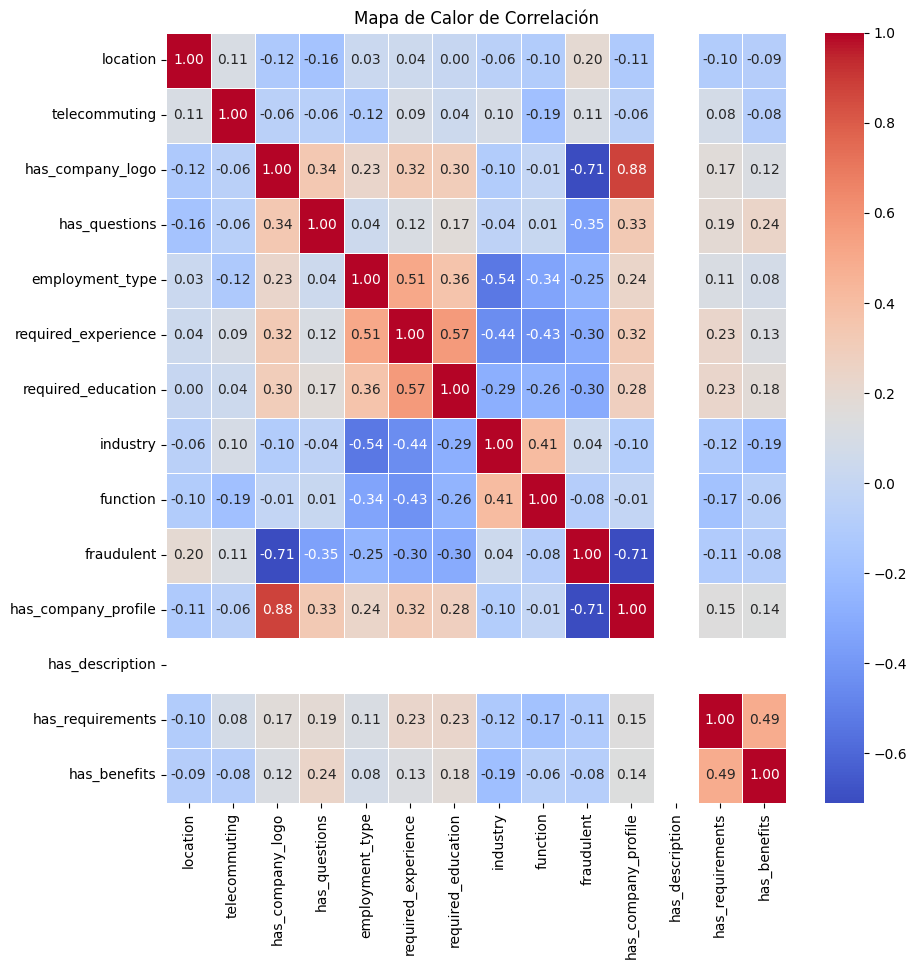

In [ ]:
#Se examina las correlaciones entre las variable del dataset
corr=df_scam_II.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

Tras la inspección del gráfico se puede obtener los siguientes insights:
*   La correlación más alta del gráfico asocia a los campos 'has_company_profile' y 'has_company_logo'.
*   Otras correlaciones de alto valor se aprecian entre variables 'industry', 'employment_type', 'required_experience' y 'required_education'.
*   Las variables que guardan mayor correlación con 'fraudulent' son 'has_company_profile' y 'has_company_logo'.





#Entrenamiento y Testeo

##Modelo 1: Árbol de decisión

In [ ]:
#Separamos nuestro dataset
X=df_scam_II.drop('fraudulent',axis=1)
y=df_scam_II.fraudulent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
#Entrenamos el modelo
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
#Generamos predicciones
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
#Generamos predicciones con valores de probabilidad
clf_predict_proba = pd.DataFrame(clf.predict_proba(X_test), columns=['no_fraudulento','fraudulento'])
clf_predict_proba

,no_fraudulento,fraudulento
0,0.457143,0.542857
1,0.457143,0.542857
2,0.125000,0.875000
3,0.064103,0.935897
4,0.125000,0.875000
...,...,...
292,1.000000,0.000000
293,1.000000,0.000000
294,0.064103,0.935897
295,0.064103,0.935897


In [ ]:
#Tabla de probabilidades de la etiqueta
clf_predict_proba.describe().loc['mean',:].to_frame()

,mean
no_fraudulento,0.515482
fraudulento,0.484518


In [ ]:
print('Score del modelo: {:.4f}'.format(clf.score(X_test, y_test)))

Score del modelo: 0.8889


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       156
           1       0.83      0.96      0.89       141

    accuracy                           0.89       297
   macro avg       0.89      0.89      0.89       297
weighted avg       0.90      0.89      0.89       297



Del resultado anterior podemos decir:

Con respescto a **precision**, de todos los registros que el modelo predijo serían fraulentos, el 83% resultaron correctos; para los no fraudulentos el 96% de los resultados predichos fueron correctos.

Con respecto a **recall**, de todos los registros que resultaron fraudulentos, el modelo logró predecir correctamente el 96%; para los no fraudulentos el modelo logró predecir correctamente el 83%.

Con respecto a **f1-score**, considerando un fuerte acercamiento al 1 podemos decir que este modelo tiene muy buen desempeño

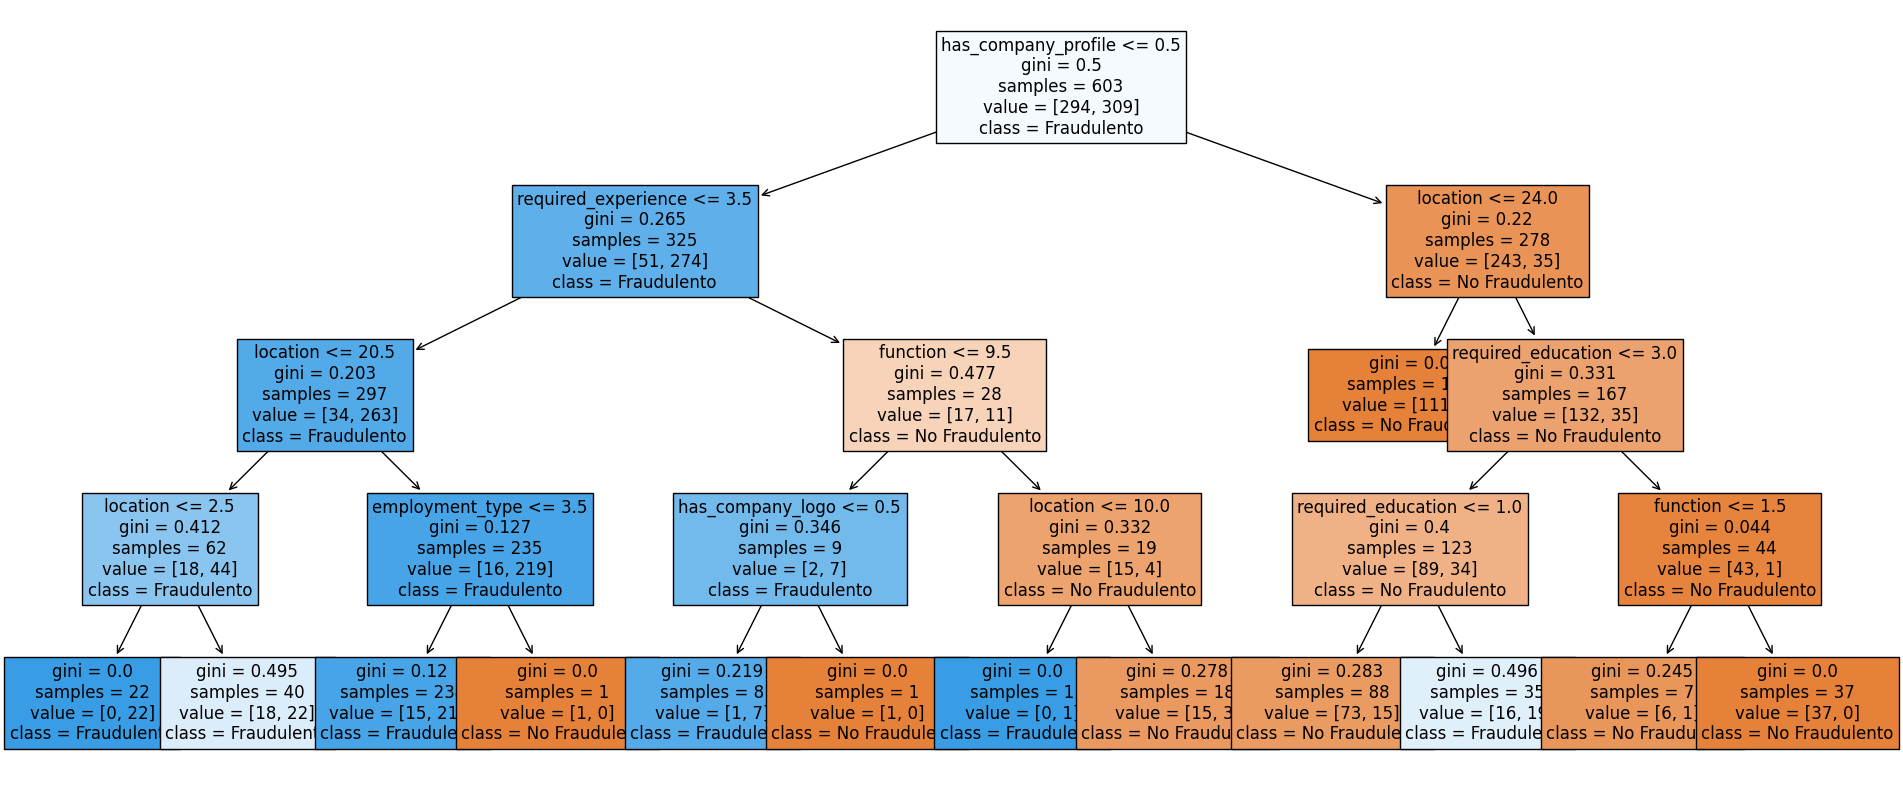

In [ ]:
#Generamos gráfica del árbol
fig = plt.figure(figsize=(24,10))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names={0:'No Fraudulento', 1:'Fraudulento'},
                   filled=True,
                  fontsize=12)

##Modelo 2: Regresión logística

In [ ]:
#Se carga objeto para la regresión logística
#La cantidad de iteraciones (max_iter) se llevó a 1000 ya que no convergía usando el valor de iteraciones por defecto (100)
log_reg=LogisticRegression(max_iter=1000)

In [ ]:
#Se entrena el modelo
#Se utilizan los mismos valores de entrenamiento y prueba calculados para el modelo anterior
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Se generan las predicciones del modelo
y_pred=log_reg.predict(X_test)

In [ ]:
#Generamos predicciones con valores de probabilidad
log_reg_predict_proba = pd.DataFrame(log_reg.predict_proba(X_test), columns=['no_fraudulento','fraudulento'])

In [ ]:
#Tabla de probabilidades de la etiqueta
log_reg_predict_proba.describe().loc['mean',:].to_frame()

,mean
no_fraudulento,0.515094
fraudulento,0.484906


In [ ]:
print('Score del modelo: {:.4f}'.format(log_reg.score(X_test, y_test)))

Score del modelo: 0.8586


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       156
           1       0.84      0.87      0.85       141

    accuracy                           0.86       297
   macro avg       0.86      0.86      0.86       297
weighted avg       0.86      0.86      0.86       297



Al obtener el reporte de desempeño podemos concluir que el modelo 1 (árbol de decisiones) tiene un mejor desempeño que el modelo 2 (regresión logística).

#Optimización

##Optimización de Modelo 1 (RandomizedSearchCV)


In [ ]:
#Se definen los parámetros en los que el algoritmo iterará
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10],
}

#Se implementa el algoritmo de optimización
rs=RandomizedSearchCV(DecisionTreeClassifier(),params,cv=5,return_train_score=False,n_iter=2)
rs.fit(X_test, y_test)

#Sólo se muestran los campos de interés
pd.DataFrame(rs.cv_results_)[['param_criterion','param_splitter','param_max_depth','mean_test_score']]

,param_criterion,param_splitter,param_max_depth,mean_test_score
0,gini,best,6,0.895480
1,gini,random,2,0.865311


In [ ]:
#Se hace una nueva corrida del algoritmo con los parámetros optimizados
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
clf = clf.fit(X_test, y_test)
print('El score del modelo con parámetros optimizados es ',clf.score(X_test, y_test))

El score del modelo con parámetros optimizados es  0.9461279461279462


##Optimización de Modelo 2 (GridSearchCV)

In [ ]:
#Se definen los parámetros en los que el algoritmo iterará
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2'],
    'solver':['lbfgs', 'liblinear', 'newton-cg'],
    'max_iter':[200, 400, 600, 800, 1000]
}
lr_optimizada = GridSearchCV(LogisticRegression(), params, cv=5, return_train_score=False)
lr_optimizada.fit(df_scam_II, df_scam_II.fraudulent)
pd.DataFrame(lr_optimizada.cv_results_)[['param_C','param_penalty','param_solver', 'param_max_iter','mean_test_score']]

,param_C,param_penalty,param_solver,param_max_iter,mean_test_score
0,0.001,l1,lbfgs,200,NaN
1,0.001,l1,liblinear,200,0.500000
2,0.001,l1,newton-cg,200,NaN
3,0.001,l2,lbfgs,200,0.771111
4,0.001,l2,liblinear,200,0.774444
...,...,...,...,...,...
175,100,l1,liblinear,1000,1.000000
176,100,l1,newton-cg,1000,NaN
177,100,l2,lbfgs,1000,1.000000
178,100,l2,liblinear,1000,1.000000


In [ ]:
#Se hace una nueva corrida del algoritmo con los parámetros optimizados
log_reg=LogisticRegression(C=100,penalty='l2',solver='lbfgs',max_iter=1000)
log_reg.fit(X_train,y_train)
print('El score del modelo con parámetros optimizados es ',log_reg.score(X_test, y_test))

El score del modelo con parámetros optimizados es  0.8585858585858586


#Conclusiones

*   Las variable con alto volumen de categorías como 'department' necesitan de un análisis más riguroso para disminuir su cantidad de categorías con la intención de sacar valor agregado de sus elementos.
*   Las variable salary_range, la única con intención numérica no aportó valor práctico al estudio por su alto volumen de registro vacíos (~84%).
*   El mayor volumen de empleos se ofrece para profesionales con educación superior de carrera larga (4 a 6 años), es decir perfiles como Lincenciados e Ingenieros, entre otros.
*   Las variables que guardan mayor correlación con 'fraudulent' son 'has_company_profile' y 'has_company_logo'.
*   En referencia a los algoritmos implementados, el de mejor desempeño fue el Árbol de decisión, con un score inicial de ~0.89 y luego de la optimización llegó a ~0.95



#Recomendaciones

*   Implementar una mayor gama de algoritmos de clasificación para tener una batería de la cual escoger el mejor de todos
*   Implementar algoritmos de validación cruzada (k-fold) [Nota para el Profesor: en realidad intenté implementarlo pero algo estaba haciendo mal que los resultados no eran lógicos]
*   Implentar algoritmos de procesamiento de lenguaje natural para procesar los campos 'title', 'company_profile', 'description', 'requirements' y 'benefits' para poder detectar patrones que puede colaborar en la implementación de aquellos anuncios fraudulentos de acuerdo al texto del anuncio.
*   Generación de un documento ejecutivo que permita ver un resumen de este ejercicio [Nota para el Profesor: no fue logrado porque logré muy poco tiempo para este proyecto y me enfoqué en lograr el notebook]



#Agradecimientos

*   A los compañeros de curso
*   Al equipo de profesores, quienes mostraron un altísimo nivel, con especial mención al Titular Walter Bernal y a mi Tutora María Soledad Gutiérrez.
*   A mi querida familia, que soportó mis apuros y mis ausencias.

